# Section 4: Inmobiliario y Habitacionales

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import count
import numpy as np
import codecs

## A. Writing Json file with format 
def write_json_UTF8(jsonDir, name_file):
    with open(name_file, 'w') as outfile:
        json.dump(jsonDir, outfile, ensure_ascii=False)
    #read input file
    with codecs.open(name_file, 'r', encoding = "iso-8859-1") as file:
          lines = file.read()
    #write output file
    with codecs.open(name_file, 'w', encoding = 'utf8') as file:
          file.write(lines)
    print("CREATED: ", name_file)

## B. Fixing numbers    
def repair_num(value):
    try:
        aux = float(value)

    except:
        "Existe algun signo"
        aux = ""
        for letra in str(value):

            if letra.isdigit():
                aux = aux+letra
            elif letra == ".":
                aux = aux+letra
        if aux == "":
            pass

    return float(aux)

## C. Formating Json
def DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm=False):

    globalDir = {}
    anioInit = -999
    listData = []
    dirData = {}
    initDir = True

    df_norm = None
    if norm:
        df_copy = df.copy()
        df_norm = (df_copy[varible_v]-df_copy[varible_v].min()) / \
            (df_copy[varible_v].max()-df_copy[varible_v].min())

    for i, anio, mes, var_value in zip(count(), df["anio"], df["mesSTR"], df[varible_v]):
        try:
            anio = int(anio)
        except:
            print("set:", anio)
            listData.append(dirData)
            break

        # Si todas son nan no sirve
        L = 0
        for index, v_reg in enumerate(varible_v):
            if str(df[v_reg].values[i]) == "nan":
                L = L+1
        if L == len(varible_v):
            print("allNone", anio)
            continue

        if anioInit < anio:
            if anioInit > 0:

                listData.append(dirData)
                dirData = {}
                initDir = True

        if initDir:
            dirData["anio"] = anio
            dirData["regiones"] = {}
            for index, v_reg in enumerate(varible_v):
                dirData["regiones"][reg_name[index]] = {"meses": {}}

            initDir = False

        for index, v_reg in enumerate(varible_v):
            dirData["regiones"][reg_name[index]]["meses"][mes] = {}

        for index, v_reg in enumerate(varible_v):

            # dirData["regiones"][reg_name[index]]["meses"][mes]["indicar_principal"]=df[v_reg].values[i]
            if norm:
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index]] = round(
                    float(df_norm[v_reg].values[i]), 4)
                if (df_norm[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            else:
                # si no hayd data
                data_value = repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" or len(str(data_value).lower()) == 0:
                    data_value = 0
                if data_value - int(data_value) > 0.0001:
                    data_value = round(data_value, 1)
                else:
                    data_value = int(data_value)
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes][variable_meaning[index]] = data_value
                if (df[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            if len(toolTip_v[index]) > 0:

                toolTip_values = [str(df[x].values[i])
                                  for x in toolTip_v[index]]
                tip = {}
                #print(index, v_reg, i, df[v_reg].values[i])
                data_value = repair_num(df[v_reg].values[i])

                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                # add data to tooltipe

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]

                for indexTool, name in enumerate(toolTip_mening[index]):
                    if str(toolTip_values[indexTool]).lower() == "nan":
                        tip[name] = "-"
                    else:
                        tip[name] = toolTip_values[indexTool]

                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
            else:

                tip = {}
                data_value = repair_num(df[v_reg].values[i])
                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]
                
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
                #old
                #dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"] ={}
        anioInit = anio

    return listData

## D. Creating image to download
sns.set()
def create_image(df, varible_v, variable_meaning, save_dir):
    print("img", varible_v, variable_meaning)
    objetive_var = varible_v

    plt.close()
    plt.clf()
    
    df['date'] = df["Mes"].map(str) + '-' + df["anio"].map(str)
    for value in df['date'] :
        df['date'] = pd.to_datetime(
        df['date'], format='%m-%Y').dt.strftime('%m-%Y')

    date = []
    val = []
    for i, value in enumerate(df[objetive_var]):
        if str(value) == "nan":
            continue
        else:
            value = repair_num(value)
            val.append(value)
            print((df['date'].values[i]))
            date.append(df['date'].values[i])

    df = pd.DataFrame(columns=['date', objetive_var])
    df['date'] = date
    df[objetive_var] = val

    fig, ax = plt.subplots()
    sns.set_style("darkgrid")

    print(len(df['date']), len(df[objetive_var]))

    ax = sns.lineplot(x=range(0, len(df['date'])), y=df[objetive_var])

    """
    max_xticks = 11
    xloc = plt.MaxNLocator(max_xticks)
    print(xloc)
    ax.xaxis.set_major_locator(xloc)
    """

    names = []
    print(len(df['date']))

    ran = int((len(df['date'])+.5)/10)
    if ran == 0:
        ran = 1
    if len(df['date']) / ran < 10:
        ran = 1
    names = [df['date'].values[d] for d in range(0, len(df['date']), ran)]
    ticklabels = names
    ax.set_xticks(range(0, len(df['date'])+1, ran))
    ax.set_xticklabels(ticklabels)
    fig.autofmt_xdate()
    plt.title(variable_meaning)
    plt.ylabel(variable_meaning)
    plt.savefig(save_dir, dpi=100)
    plt.show()

    
## E. Reading Data from API 
file = '../01-Data/Inmobiliarios_Habitacionales.xlsx'
global_dir = "../03-Graph"
norm = False  # no normalizada
init_data_name="IH_"
link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/Inmobiliarios_Habitacionales.xlsx"
link_img ="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
link_glosario="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header=[ {"titulo":None,"Fuente":None, "LinkDatosOriginales":None, 
               "comment":None, "linkPlot":None,"glosario":None}]   

## Processing Data 

### 1) IH_01_Perm_Edif_m2.json

set: None
img Total pais Total pais
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
117 117
117


<Figure size 432x288 with 0 Axes>

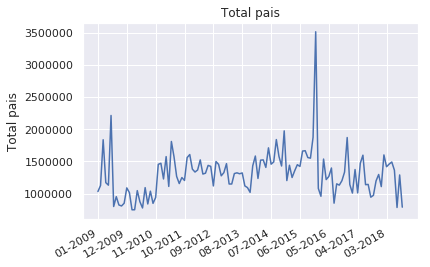

CREATED:  ../03-Graph/IH_01_Perm_Edif_m2.json


In [8]:
sheetname = 'Perm_Edif'
filename="Perm_Edif_m2.json"
full_file_name = '01_Perm_Edif_m2'
info_header[0]["titulo"]= 'Permisos de Edificación (m2)'
info_header[0]["Fuente"]="CChC - INE"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="Permiso de Edificación. Fuentes CChC e INE. A partir del año 2009 están agregadas a los permisos de edificación las regiones XIV y XV"
info_header[0]["linkPlot"]=link_img + sheetname +".png"
info_header[0]["glosario"]=link_glosario+"general.pdf"

if sheetname=='Perm_Edif':
    df = pd.read_excel( file, sheet_name = sheetname )
    #Nombre de la variable
    varible_v=["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"
                 ]
    #Nombre para Json
    variable_meaning=["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"
                 ]
    #Nombre de la region 
    reg_name=["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"
                 ]

    # Nombre de la variable para toolTip
    toolTip_v=[
        
                ["Var Total pais",	"I, C y EF- Total país",	"Vvda-R:Total país",	"Serv.-R:Total país"],
                ["Var I",	"I, C y EF-R:I",	"Vvda-R:I",	"Serv.-R:I"],
                ["Var II",	"I, C y EF-R:II",	"Vvda-R:II",	"Serv.-R:II"],
                ["Var III",	"I, C y EF-R:III",	"Vvda-R:III",	"Serv.-R:III"],
                ["Var IV",	"I, C y EF-R:IV",	"Vvda-R:IV",	"Serv.-R:IV"],
                ["Var V",	"I, C y EF-R:V",	"Vvda-R:V",	"Serv.-R:V"],
                ["Var VI",	"I, C y EF-R:VI",	"Vvda-R:VI",	"Serv.-R:VI"],
                ["Var VII",	"I, C y EF-R:VII",	"Vvda-R:VII",	"Serv.-R:VII"],
                ["Var VIII",	"I, C y EF-R:VIII",	"Vvda-R:VIII",	"Serv.-R:VIII"],
                ["Var IX",	"I, C y EF-R:IX",	"Vvda-R:IX",	"Serv.-R:IX"],
                ["Var X",	"I, C y EF-R:X",	"Vvda-R:X",	"Serv.-R:X"],
                ["Var XI",	"I, C y EF-R:XI",	"Vvda-R:XI",	"Serv.-R:XI"],
                ["Var XII",	"I, C y EF-R:XII",	"Vvda-R:XII",	"Serv.-R:XII"],
                ["Var RM",	"I, C y EF-R:RM",	"Vvda-R:RM",	"Serv.-R:RM"],
                ["Var XIV",	"I, C y EF-R:XIV",	"Vvda-R:XIV",	"Serv.-R:XIV"],
                ["Var XV",	"I, C y EF-R:XV",	"Vvda-R:XV",	"Serv.-R:XV"]
              ]

    # Nombre de la variable para Json
    toolTip_mening=[
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."],
        ["Var Mes","I, C y EF","Vvda","Serv."]
    ]
                                      
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)        

### 2) IH_02_Perm_Edif_vvda.json 

set: None
img Total Nº Permisos No.
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
117 117
117


<Figure size 432x288 with 0 Axes>

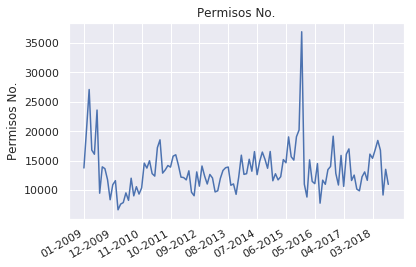

CREATED:  ../03-Graph/IH_02_Perm_Edif_vvda.json


In [9]:
sheetname = 'Perm. Edif. Vvda y M2'
filename="Perm_Edif_vvda.json"
full_file_name = '02_Perm_Edif_vvda'
info_header[0]["titulo"]="Permisos de Edificación por Vivienda (m2)"
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="IMACON: obtenido desde CCHC"
info_header[0]["linkPlot"]=link_img + sheetname +".png"
info_header[0]["glosario"]=link_glosario+"general.pdf"

if sheetname=='Perm. Edif. Vvda y M2':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[
    ["Total Nº",
     "Permisos Viviendas nuevas Nº","Permisos Viviendas Ampliaciones Nº", 
     "m2 Habitacional Viviendas nuevas", "m2 Habitacional Ampliaciones" ]
    ]
    dataCorto=[
    ["Permisos No.","Vvdas. Nuevas.", "Vvdas. Ampl.", "Vvdas Nuevas m2", "Vvdas Ampl. m2" ]
    ]
    
    for index,lista in enumerate(data):
        # Nombre de la variable para toolTip // sin tool TiptoolTip_v=[[]]
        toolTip_v=[[]]
        # Nombre de la variable para Json
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                #Nombre de la variable
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    #print(varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)      

### 3) IH_03_venta_viv.json 

set: None
img Vel venta total meses Velocidad Total
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
114 114
114


<Figure size 432x288 with 0 Axes>

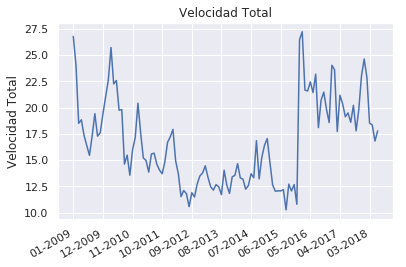

CREATED:  ../03-Graph/IH_03_venta_viv.json


In [10]:
sheetname = 'Ventas total sector'
filename="IH_venta_viv.json"
full_file_name = '03_venta_viv'
info_header[0]["titulo"]="Velocidad de Venta de Viviendas"
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="La velocidad de ventas que se calcula como el cociente entre el stock disponible en un mes concreto y las unidades vendidas en ese mismo mes. "
info_header[0]["linkPlot"]=link_img + sheetname +".png"
info_header[0]["glosario"]=link_glosario+"general.pdf"

if sheetname=='Ventas total sector':
    df = pd.read_excel( file, sheet_name = sheetname)

    varible_v=[
    "Vel venta total meses",
    "Vel venta depto meses",
    "Vel venta casas meses"
    ]
    #Nombre para Json
    variable_meaning=[
    "Velocidad Total",
    "Velocidad Deptos",
    "Velocidad Casas"
    ]
    #Nombre de la region 
    reg_name=[
    "Velocidad Total",
    "Velocidad Deptos",
    "Velocidad Casas"
    ]

    # Nombre de la variable para toolTip
    toolTip_v=[
                ["Var_mes"],
                ["Var_mes_depto"],
                ["Var_mes_casas"]
    ]

    # Nombre de la variable para Json
    toolTip_mening=[
        ["Var Mes"],
        ["Var Mes"],
        ["Var Mes"]
    ]


    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]        
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)      

### 4) IH_04_venta_stgo.json

set: None
img Total Miles UF Total Miles UF
01-2004
02-2004
03-2004
04-2004
05-2004
06-2004
07-2004
08-2004
09-2004
10-2004
11-2004
12-2004
01-2005
02-2005
03-2005
04-2005
05-2005
06-2005
07-2005
08-2005
09-2005
10-2005
11-2005
12-2005
01-2006
02-2006
03-2006
04-2006
05-2006
06-2006
07-2006
08-2006
09-2006
10-2006
11-2006
12-2006
01-2007
02-2007
03-2007
04-2007
05-2007
06-2007
07-2007
08-2007
09-2007
10-2007
11-2007
12-2007
01-2008
02-2008
03-2008
04-2008
05-2008
06-2008
07-2008
08-2008
09-2008
10-2008
11-2008
12-2008
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2

<Figure size 432x288 with 0 Axes>

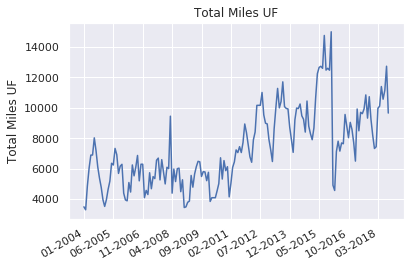

CREATED:  ../03-Graph/IH_04_venta_stgo.json


In [11]:
sheetname = 'Ventas Stgo'
filename="venta_stgo.json"
full_file_name = '04_venta_stgo'
info_header[0]["titulo"]="Velocidad de Venta Viviendas en Santiago"
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="La velocidad de ventas que se calcula como el cociente entre el stock disponible en un mes concreto y las unidades vendidas en ese mismo mes. "
info_header[0]["linkPlot"]=link_img + sheetname +".png"
info_header[0]["glosario"]=link_glosario+"general.pdf"

if sheetname=='Ventas Stgo':
    
    df = pd.read_excel( file, sheet_name = sheetname)

    #Nombre de la variable
    varible_v=[
    "Total Miles UF",
    "Deptos Miles UF",
    "Casas Miles UF"
    ]
    #Nombre para Json
    variable_meaning=[
    "Total Miles UF",
    "Deptos Miles UF",
    "Casas Miles UF"
    ]
    #Nombre de la region 
    reg_name=[
    "Total Miles UF",
    "Deptos Miles UF",
    "Casas Miles UF"
    ]

    # Nombre de la variable para toolTip
    toolTip_v=[
                ["var_Total Miles UF","Total Stock","Total Ventas","Vel venta total meses"],
                ["var_Deptos Miles UF","Depto Stock","Depto Ventas","Vel venta depto meses"],
                ["var_Casas Miles UF","Casas Stock","Casas Ventas","Vel venta casas meses"]
    ]

    # Nombre de la variable para Json
    toolTip_mening=[
        ["Var Mes","Stock","Ventas","Vel. venta"],
        ["Var Mes","Stock","Ventas","Vel. venta"],
        ["Var Mes","Stock","Ventas","Vel. venta"]    
    ]

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]  
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)      

### 5) IH_05_Ind_precios_stgo.json

set: None
img Var % $ CASA Nor poniente Var % $ CASA Nor poniente
01-2004
02-2004
03-2004
04-2004
05-2004
06-2004
07-2004
08-2004
09-2004
10-2004
11-2004
12-2004
01-2005
02-2005
03-2005
04-2005
05-2005
06-2005
07-2005
08-2005
09-2005
10-2005
11-2005
12-2005
01-2006
02-2006
03-2006
04-2006
05-2006
06-2006
07-2006
08-2006
09-2006
10-2006
11-2006
12-2006
01-2007
02-2007
03-2007
04-2007
05-2007
06-2007
07-2007
08-2007
09-2007
10-2007
11-2007
12-2007
01-2008
02-2008
03-2008
04-2008
05-2008
06-2008
07-2008
08-2008
09-2008
10-2008
11-2008
12-2008
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-201

<Figure size 432x288 with 0 Axes>

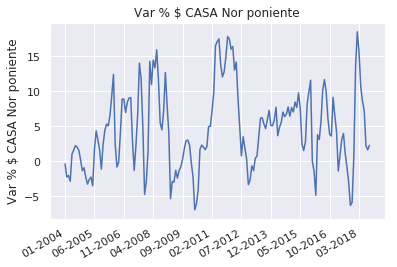

CREATED:  ../03-Graph/IH_05_Ind_precios_stgo.json


In [13]:
sheetname = 'Ind_Precios_stgo'
filename="Ind_precios_stgo.json"
full_file_name = '05_Ind_precios_stgo'
info_header[0]["titulo"]="Índice Real de Precios de Vivienda en Santiago"
info_header[0]["Fuente"]="IRPV, Índice Real de Precios de Vivienda, CChC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="Las variaciones son respecto al mismo mes del año anterior."
info_header[0]["linkPlot"]=link_img + sheetname +".png"
info_header[0]["glosario"]=link_glosario+"general.pdf"

if sheetname=='Ind_Precios_stgo':
    df = pd.read_excel( file, sheet_name = sheetname)
    #Nombre de la variable
    varible_v=[
    'Var % $ CASA Nor poniente',
    'Var % $ CASA Nor oriente',
    'Var % $ CASA Sur',
    'Var % $ DEPTO Santiago Centro',
    'Var % $ DEPTO Nor poniente',
    'Var % $ DEPTO Nor oriente',
    'Var % $ DEPTO Sur'
    ]
    #Nombre para Json
    variable_meaning=[
    'Var % $ CASA Nor poniente',
    'Var % $ CASA Nor oriente',
    'Var % $ CASA Sur',
    'Var % $ DEPTO Santiago Centro',
    'Var % $ DEPTO Nor poniente',
    'Var % $ DEPTO Nor oriente',
    'Var % $ DEPTO Sur'
    ]
    #Nombre de la region 
    reg_name=[
    'Var % $ CASA NorPoniente',
    'Var % $ CASA NorOriente',
    'Var % $ CASA Sur',
    'Var % $ DEPTO Santiago Centro',
    'Var % $ DEPTO NorPoniente',
    'Var % $ DEPTO NorOriente',
    'Var % $ DEPTO Sur'
    ]

    # Nombre de la variable para toolTip
    toolTip_v=[
                ["Var % $ CASA"],
                ["Var % $ CASA"],
                ["Var % $ CASA"],
                ["Var % $ DPTO"],
                ["Var % $ DPTO"],
                ["Var % $ DPTO"],
                ["Var % $ DPTO"]
    ]

    # Nombre de la variable para Json
    toolTip_mening=[
                ["Var CASA total"],
                ["Var CASA total"],
                ["Var CASA total"],
                ["Var Depto total"],
                ["Var Depto total"],
                ["Var Depto total"],
                ["Var Depto total"]
    ]


    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 6) IH_06_Hacinamiento.json

set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
img Hacinamiento Hacinamiento
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
32 32
32


<Figure size 432x288 with 0 Axes>

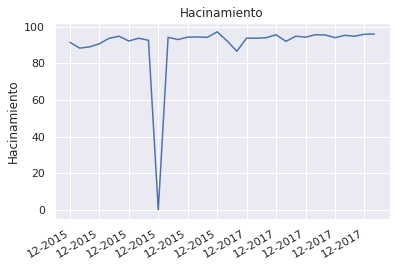

CREATED:  ../03-Graph/IH_06_Hacinamiento.json


In [15]:
sheetname = 'Hacinamiento'
full_file_name = '06_Hacinamiento'
regiones=['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaiso',
"O'Higgin",'Maule','Ñuble','Biobio','La Araucanía','Los Ríos',
'Los Lagos','Aysén','Magallanes','Metropolitana']
info_header[0]["titulo"] = sheetname
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "NENE del INE y SII"
info_header[0]["linkPlot"] = link_img + sheetname + ".png"
info_header[0]["glosario"] = link_glosario+"general.pdf"

if sheetname == 'Hacinamiento':
    byReg = {}
    for val in regiones:
        df = pd.read_excel("../01-Data/casen.xlsx", sheet_name=sheetname)
        df[df['Region'] == val]
        # Nombre de la variable
        varible_v = ["Hacinamiento","sin Hacinamiento"]
        # Nombre para Json
        variable_meaning = ["Hacinamiento","sin Hacinamiento"]
        # Nombre de la region
        reg_name = ["Hacinamiento","sin Hacinamiento"]
        # Nombre de la variable para toolTip
        toolTip_v = [["Var1"],["Var2"]]
        # Nombre de la variable para Json
        toolTip_mening = [["Var"],["Var"]]
        
        jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
        byReg[val] = jsonDir

    jsonDir = [info_header, byReg]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)

### 7) IH_07_Materialidad.json

set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
img aceptable aceptable
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
32 32
32


<Figure size 432x288 with 0 Axes>

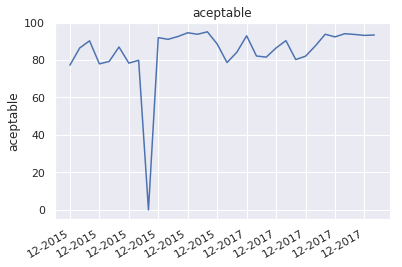

CREATED:  ../03-Graph/IH_07_Materialidad.json


In [16]:
sheetname = 'Materialidad'
full_file_name = '07_Materialidad'
regiones=['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaiso',
"O'Higgin",'Maule','Ñuble','Biobio','La Araucanía','Los Ríos',
'Los Lagos','Aysén','Magallanes','Metropolitana']
info_header[0]["titulo"] = sheetname
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "NENE del INE y SII"
info_header[0]["linkPlot"] = link_img + sheetname + ".png"
info_header[0]["glosario"] = link_glosario+"general.pdf"

if sheetname == 'Materialidad':
    byReg = {}
    for val in regiones:
        df = pd.read_excel("../01-Data/casen.xlsx", sheet_name=sheetname)
        df[df['Region'] == val]
        # Nombre de la variable
        varible_v = ["aceptable","recuperable","Irrrecuperable"]
        # Nombre para Json
        variable_meaning = ["aceptable","recuperable","Irrrecuperable"]
        # Nombre de la region
        reg_name = ["aceptable","recuperable","Irrrecuperable"]
        # Nombre de la variable para toolTip
        toolTip_v = [["var1"],["var2"],["var3"]]
        # Nombre de la variable para Json
        toolTip_mening = [["Var"],["Var"],["Var"]]
        
        jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
        byReg[val] = jsonDir

    jsonDir = [info_header, byReg]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)        

### 8) IH_08_Conservacion.json

set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
img Bueno Bueno
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2015
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
12-2017
32 32
32


<Figure size 432x288 with 0 Axes>

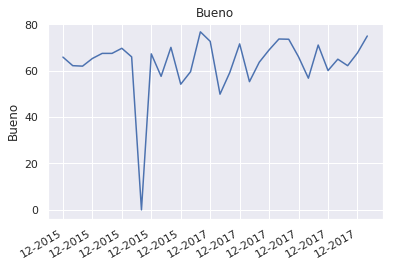

CREATED:  ../03-Graph/IH_08_Conservacion.json


In [17]:
sheetname = 'Conservacion'
full_file_name = '08_Conservacion'
regiones=['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaiso',
"O'Higgin",'Maule','Ñuble','Biobio','La Araucanía','Los Ríos',
'Los Lagos','Aysén','Magallanes','Metropolitana']
info_header[0]["titulo"] = sheetname
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "NENE del INE y SII"
info_header[0]["linkPlot"] = link_img + sheetname + ".png"
info_header[0]["glosario"] = link_glosario+"general.pdf"

if sheetname == 'Conservacion':
    byReg = {}
    for val in regiones:
        df = pd.read_excel("../01-Data/casen.xlsx", sheet_name=sheetname)
        df[df['Region'] == val]
        # Nombre de la variable
        varible_v = ["Bueno", "Regular", "Malo"]
        # Nombre para Json
        variable_meaning = ["Bueno", "Regular", "Malo"]
        # Nombre de la region
        reg_name = ["Bueno", "Regular", "Malo"]
        # Nombre de la variable para toolTip
        toolTip_v = [["var1"],["var2"],["var3"]]
        # Nombre de la variable para Json
        toolTip_mening = [["Var"],["Var"],["Var"]]
        
        jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
        byReg[val] = jsonDir

    jsonDir = [info_header, byReg]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     